## Importing libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats 
from scipy.stats import pearsonr
import math
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from statsmodels.tools.eval_measures import rmse

## Importing Data

In [2]:
#Reading csv file for salaries
salaries = pd.read_csv("salary.csv")
salaries.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### Cleaning Data

In [3]:
#dataframe shape
salaries.shape

(514, 11)

In [4]:
#Checking columns and their datatypes
salaries.columns.to_series().groupby(salaries.dtypes).groups

{dtype('int64'): Index(['exprior', 'yearsworked', 'yearsrank', 'degree', 'otherqual',
        'position', 'male', 'Field', 'yearsabs'],
       dtype='object'),
 dtype('float64'): Index(['salary', 'market'], dtype='object')}

There are 9 integer columns and two float columns

In [5]:
#Checking columns and missing values
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


•There are 514 entries.

•The number of columns is 11 will the number of rows is 514.

•There are two floats and 11 integers.

•And there is one missing value in salary

In [6]:
#Examining null values in salary and filling null with mean

salaries = salaries.fillna(salaries['salary'].mean())

salaries.isnull().sum()


salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [7]:
#Calculating the InterQuartil## 1.3 Examining extreme valuese Range for salary
Q1 = salaries["salary"].quantile(0.25)
Q3 = salaries["salary"].quantile(0.75)
IQR = Q3 - Q1
print("InterQuartile Range for salary =",IQR)


InterQuartile Range for salary = 20306.25


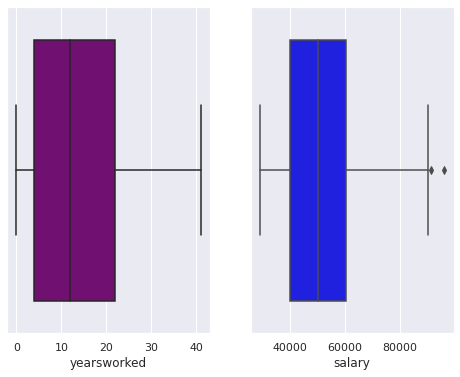

In [8]:
#Using boxplots to visualise distribution
sns.set()
fig, axes = plt.subplots(1,2, figsize = (8, 6))
sns.boxplot(x = salaries["yearsworked"], ax = axes[0], data = salaries, color = "purple")
sns.boxplot(x = salaries["salary"], ax = axes[1], data = salaries, color = "blue")
plt.show()

•In the above figures the distributions are skewed right

•The part of the box to the left of the median is shorter than the part to the right of the median.

•That means the people with lesser work experince are closer together than those with more years.

•For salary per year the people with leser salaries are closer tha those with more and there are outliers in thos boxplot.


## EDA

In [9]:
#Statistical summary of dataframe
salaries.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12672.762650,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50165.500000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60306.250000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [11]:
#Checking correlation
salaries.corr()


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.498485,-0.069622
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044552,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.167129,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.361447,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.498485,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


In [12]:
#Checking skewness of salary and years worked

print(salaries["salary"].skew())
print(salaries["yearsworked"].skew())

0.448656690197232
0.2809060751170079


•Salary and years is skewed right or it's positively skewed.

•This is  slight or weak positive skewness.

•This means that the mean is greater than the median.

•This then means that there are extreme values called outliers.

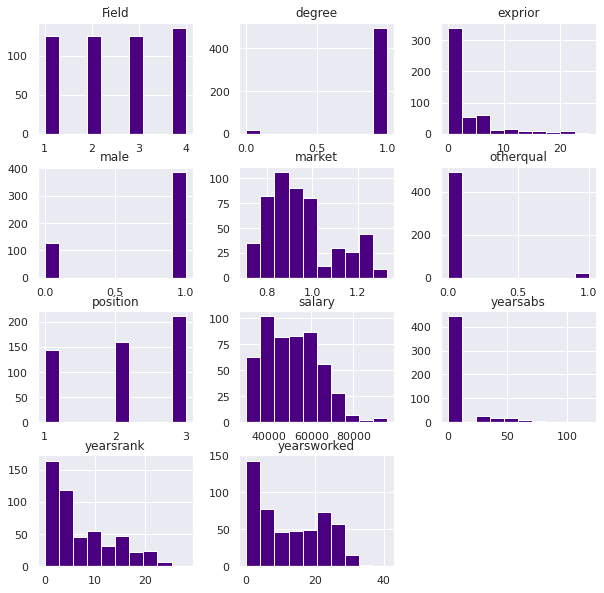

In [13]:
salaries.hist(figsize =(10, 10), color = "indigo");
_= plt.show()

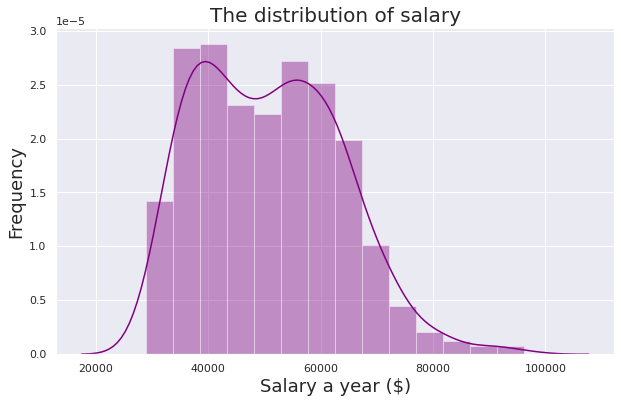

In [14]:
# The histogram distribution is now visualized for Salary per year

plt.figure(figsize = (10,6))
sns.distplot(salaries["salary"], kde = True, color = "purple")
plt.title("The distribution of salary", fontsize = 20)
plt.xlabel("Salary a year ($)", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)
plt.show;

•Most of the people in the data set earn low salaries

•This is a heavily_tailed positively skewed distribution because the tail is longer on the right

•The mean is more than the median.

• Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

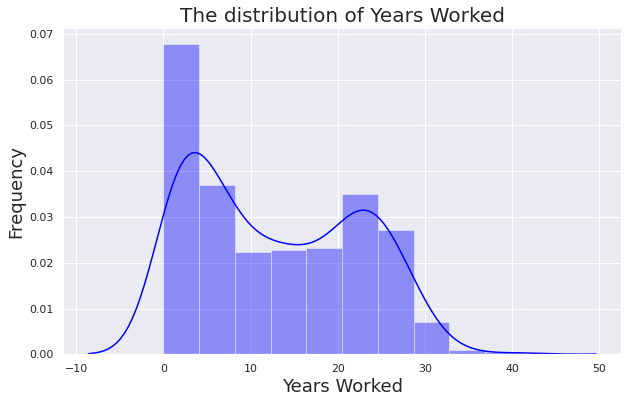

In [15]:
# The histogram distribution is now visualized for yearsworked

plt.figure(figsize = (10,6))
sns.distplot(salaries["yearsworked"], kde = True, color = "blue")
plt.title("The distribution of Years Worked", fontsize = 20)
plt.xlabel("Years Worked", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18)
plt.show;

•Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

•A of the people in the data set haven't been working for many years.

•The mean of the data is not very higher than the median.

•In the years worked distribution there is a slightly right-skewed normal distribution with the bulk of the staff between 8 and 20 years old.

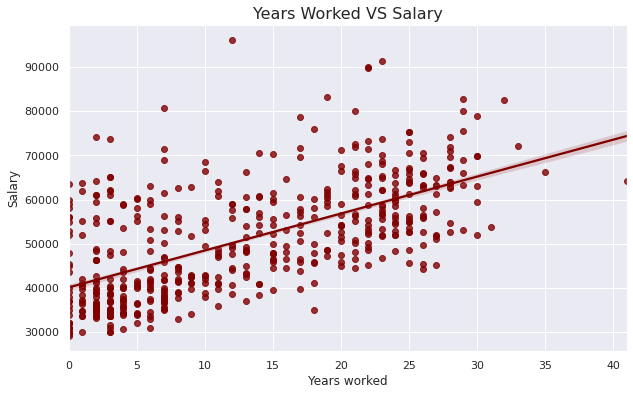

In [16]:
sns.set()
plt.figure(figsize = (10,6))
sns.regplot(data = salaries, x = salaries["yearsworked"], y =salaries["salary"],ci = 68,color = "maroon")
plt.xlabel("Years worked", fontsize = 12)
plt.ylabel("Salary", fontsize = 12 )
_= plt.title("Years Worked VS Salary", fontsize = 16)

In [17]:
#Checking pearson correlation
pearsonr(salaries["yearsworked"],salaries["salary"])


(0.6231354820920552, 1.2747795189693407e-56)

•The scatterplot above and trendline show that a linear relationship exists between the salaries earned and the number of years worked by employees.

•This is a positive relationship.

•The p-value is low meaning that the correlation is statistically significant.

•The data is appropriate for linear regression.

•When years worked increases, salary also inceases.



In [18]:
#Creating training target
y = salaries["salary"]
 
#Creating testin target    
x = salaries[["yearsworked"]]

X = sm.add_constant(x.values)

#Slipping data into training and testing set wit an 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y,

                                                    test_size = 0.20, random_state = None)
#View head salary
y_train.head()


498    52446.00000
152    47573.00000
5      56000.00000
254    70101.78125
187    47029.00000
Name: salary, dtype: float64

In [19]:
#checking testing for shaping
print (X_train.shape, y_train.shape)

(411, 2) (411,)


In [20]:
#checking to see if training set has any null values
np.any(np.isnan(X_train))

False

In [21]:
#Calculating the InterQuartil## 1.3 Examining extreme valuese Range for salary
Q1 = salaries["salary"].quantile(0.25)
Q3 = salaries["salary"].quantile(0.75)
IQR = Q3 - Q1
print("InterQuartile Range for salary =",IQR)


InterQuartile Range for salary = 20306.25


In [22]:
#Calculating the InterQuartil## 1.3 Examining extreme valuese Range for salary
Q1 = salaries["salary"].quantile(0.25)
Q3 = salaries["salary"].quantile(0.75)
IQR = Q3 - Q1
print("InterQuartile Range for salary =",IQR)



InterQuartile Range for salary = 20306.25


•Interquartile range gives another measure of variability

•The main advantage of the IQR is that it is not affected by outliers because it    doesn’t take into account observations below Q1 or above Q3.

•It equally divides the distribution into four equal parts called quartiles.

•As a rule of thumb, observations can be qualified as outliers when they lie more than 1.5 IQR below the first quartile or 1.5 IQR above the third quartile.



In [23]:
#Calculating Lower and upper bound of salary
Q3 = np.percentile(Q3, 75)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1- IQR * 1.5
print("Lower bound for salary =", lower_bound)
print("Upper bound for salary =", upper_bound)

y_train[y_train > upper_bound]

Lower bound for salary = 9540.625
Upper bound for salary = 90765.625


280    91405.0
Name: salary, dtype: float64

•The value of outliers in more than the upper bound.

•These outliers are at index 280 and 377.


In [24]:
# drop value with index 280 and 377
drop_df = salaries.drop(280)
drop_df = salaries.drop(377)
drop_df.shape

(513, 11)

In [26]:
# create a fitted model in one line
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

In [27]:
#model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     282.4
Date:                Sat, 09 May 2020   Prob (F-statistic):           1.45e-48
Time:                        20:25:47   Log-Likelihood:                -4353.5
No. Observations:                 411   AIC:                             8711.
Df Residuals:                     409   BIC:                             8719.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.959e+04    799.258     49.537      0.000     3.8e+04    4.12e+04
x1           849.4143     50.545     16.805      0.000     750.053     948.775
==============================================================================
Omnibus:                       46.470   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.110
Skew:                           0.906   Prob(JB):                     1.46e-13
Kurtosis:                       3.407   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

•There is clear positive correlation between years worked and salary earned per year.

•The model does not significantly predict the dependant variable as the R^2 value is 0.409, which is really low. This value is statistically significant as the p-value is 0.00.

•

In [28]:
#Report amount value
model.rsquared

0.40845377094288493

In [29]:
#Significance value
model.pvalues

const    6.439213e-175
x1        1.446810e-48
dtype: float64

The percentage is 40.9% of employees’ salaries is accounted for by the number of years they have worked

In [30]:
model.params

const    39592.920655
x1         849.414309
dtype: float64

•For every year worked, people get a salary increase of 853.66 a year.

I am confident that the true value of the population is between the intervals.

In [31]:
model.predict([1,12])

array([49785.8923675])

•A person with 12 years of experience will be earning $50060.08

In [32]:
model.predict([1,80])

array([107546.06540385])

• A person with 80 years of experience will be earning $108109.289

In [33]:
salaries["yearsworked"].max()

41

•The prediction for 80 years work experience is unrealistic because the original dataset no one has work experience of more than 41 years 

In [ ]:
#To find other relationships I need the correlation of salary
salaries.corr()["salary"].sort_values(ascending = False)


•Position and rank can influence salary,this will be a moderate positive relationship.

•Field can also slightly affect salary in a  negatively way.

In [ ]:
# Root Mean Square Error for train
train_rmse = rmse(y_train, model.predict(X_train))
train_rmse

In [ ]:
#Root Mean Square Error for test
test_rmse = rmse(y_test, predictions)
test_rmse

In [ ]:
# Root Mean Square Error difference 
rmse_diff = test_rmse - train_rmse
rmse_diff

•The model has high varience and low bais.

•The model is works better on training than it does on testing.

•The RMSE of the testing dataset is more than that of training dataset.

•This means that the model is not fitted for testing dataset.

•I can conclude that the model is not overfitted.



In [ ]:
#Regression plot for train
sns.set()
plt.figure(figsize = (10,6))
sns.regplot(y_train, model.predict(X_train), color = "purple")
plt.xlabel("Y_Train",fontsize = 15)
plt.ylabel("Predictions", fontsize = 15)
_= plt.title("Train Vs Predictions",fontsize = 18)

In [ ]:
pearsonr(y_train, model.predict(X_train))


•There is a moderate, positive correlation. 

•The p-value is low meaning that the correlation is statistically significant.

•The data is appropriate for linear regression.

•The model is performing well on the train dataset.



In [ ]:
#Regression plot for tests
sns.set()
plt.figure(figsize = (10,6))
sns.regplot(y_test,predictions, color = "blue")
plt.xlabel("Y_Test",fontsize = 15)
plt.ylabel("Predictions", fontsize = 15)
_= plt.title("Tests Vs Predictions",fontsize = 18)

In [ ]:
pearsonr(y_test,predictions)


•There is a weak negative correlation.

•The p-value is less,therefore 

•Only three points are on the line of best fit.

•The data is not appropriate for linear regression.

•The is not performing well on the tests dataset.